In [1]:
import re
import os 

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 
sns.set_style("whitegrid", {"grid.linestyle":"--"})

import pandas as pd 
from pprint import pprint

!pwd

/home/bibek/Desktop/flow/michael_files


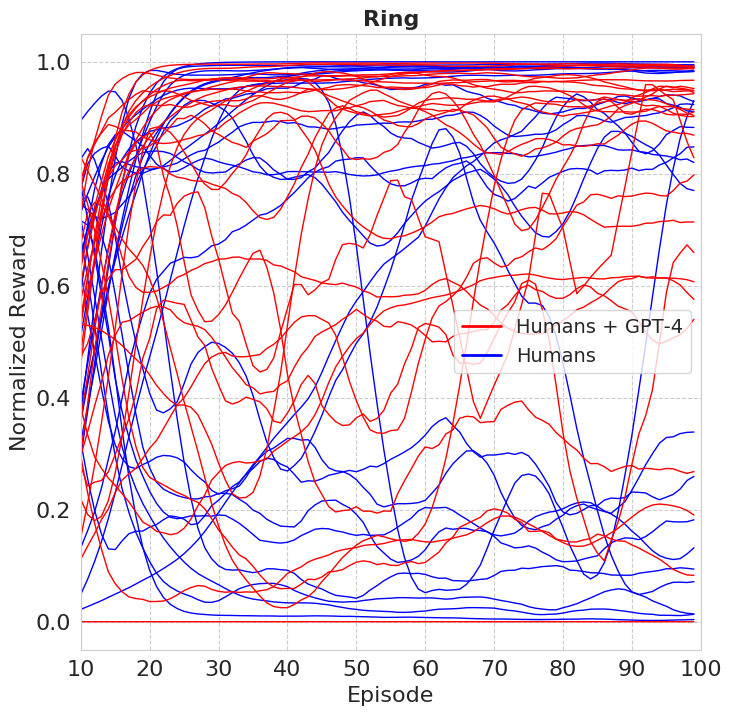

In [6]:
# plot
fig,ax = plt.subplots(figsize=(8,8), dpi=100)
fs = 16

roll_size = 10
episode_size = 100 #upto 200

for result in best_policies_human:
    data = norm_best_policies_human[result]['all_norm'][0:episode_size]
    rolling_data = pd.Series(data).rolling(window=roll_size).mean()
    ax.plot(rolling_data, color = 'b', linewidth='1.0') #, label = result)
    
for result in best_policies_human_gpt:
    data = norm_best_policies_human_gpt[result]['all_norm'][0:episode_size]
    rolling_data = pd.Series(data).rolling(window=roll_size).mean()
    ax.plot(rolling_data, color = 'r', linewidth='1.0') #, label = result)

# Just for legend lines
ax.plot(2*np.ones(episode_size), color = 'r', alpha=1.0, linewidth='2.0', label = "Humans + GPT-4")
ax.plot(2*np.ones(episode_size), color = 'b', alpha=1.0, linewidth='2.0', label = "Humans")

ax.set_ylim([-0.05,1.05])
ax.set_xlim([roll_size, episode_size])

ax.set_title("Ring", fontsize = fs, fontweight="bold")
ax.set_ylabel("Normalized Reward", fontsize = fs)
ax.set_xlabel("Episode", fontsize = fs)
ax.tick_params(axis='both', which='major', labelsize=fs)

ax.legend(fontsize=fs-2)

(200,)
(200,)


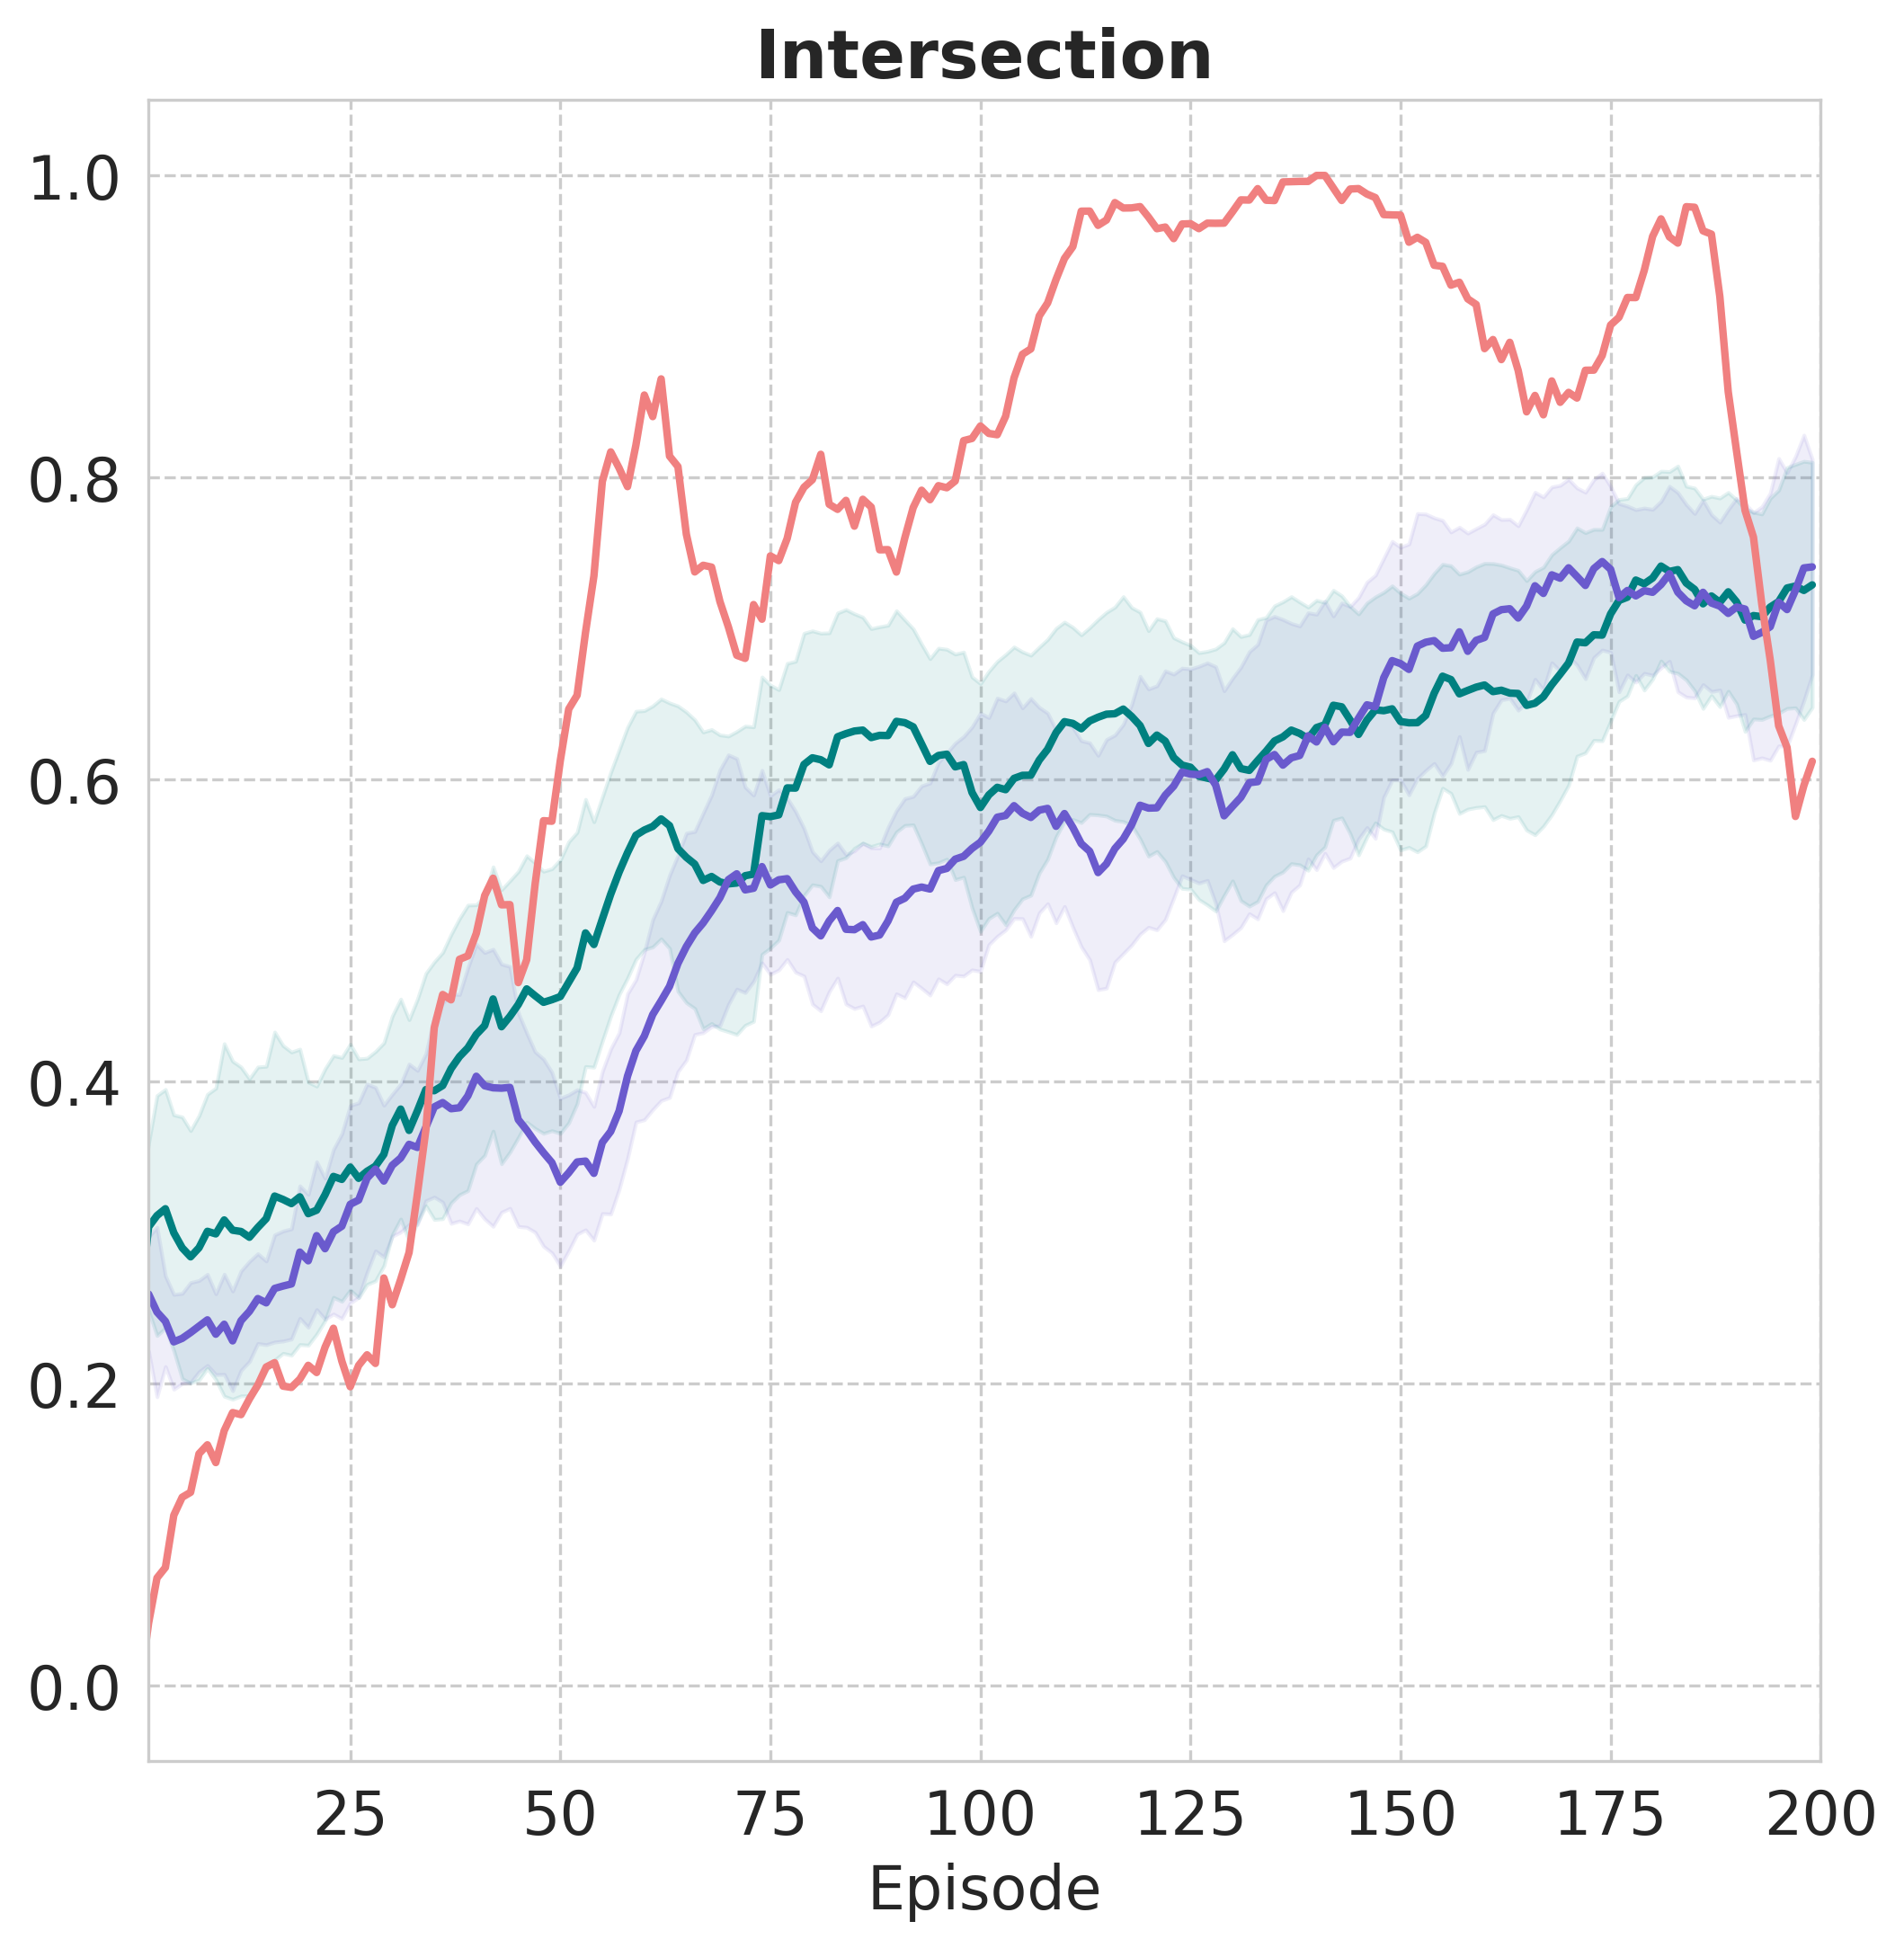

In [2]:
import re
import os 
import csv

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 
sns.set_style("whitegrid", {"grid.linestyle":"--"})

import pandas as pd 
from pprint import pprint

episode_size = 200 
roll_size = 1

# all_human = []
# for result in best_policies_human:
#     data = norm_best_policies_human[result]['all_norm'][0:episode_size]
#     all_human.append(data)
# all_human = np.array(all_human)
# all_human_mean = np.mean(all_human, axis=0)
# print(all_human_mean.shape)
    
    
# all_human_gpt = []
# for result in best_policies_human_gpt:
#     data = norm_best_policies_human_gpt[result]['all_norm'][0:episode_size]
#     all_human_gpt.append(data)
# all_human_gpt = np.array(all_human_gpt)
# all_human_gpt_mean = np.mean(all_human_gpt, axis=0)
# print(all_human_gpt_mean.shape)

def read_expert_progress():
    # Step 1: Read the csv file
    dataframe = pd.read_csv('int_expert_reward.csv')

    # Step 2: Get values of a specific column (for instance 'column_name')
    values = dataframe['episode_reward_mean'].values

    # Step 3: Save the values to a numpy array
    np_array = np.array(values)

    # Step 4: Normalize the values within the numpy array to be between 0 and 1
    normalized_array = (np_array - np.min(np_array)) / (np.max(np_array) - np.min(np_array))
    
    return normalized_array


def read_csv_to_numpy_array(input_filename):
    with open(input_filename, 'r') as input_file:
        csv_reader = csv.reader(input_file)
        row = next(csv_reader)
        numerical_row = list(map(float, row))
        numpy_array = np.array(numerical_row)
    return numpy_array

all_human_mean = read_csv_to_numpy_array("int_avgsnorm_human.csv")
all_human_gpt_mean = read_csv_to_numpy_array("int_avgsnorm_gpt.csv")

var_all_human = read_csv_to_numpy_array("int_varnorm_human.csv")
var_all_human_gpt = read_csv_to_numpy_array("int_varnorm_gpt.csv")

expert_reward = read_expert_progress()

print(var_all_human.shape)
print(var_all_human_gpt.shape)


# plot
fig,ax = plt.subplots(figsize=(8,8), dpi=300)
fs = 16

# rolling 
all_human_rolling_mean = pd.Series(all_human_mean).rolling(window=roll_size).mean()
all_human_gpt_rolling_mean = pd.Series(all_human_gpt_mean).rolling(window=roll_size).mean()

ax.plot(all_human_gpt_rolling_mean, color='teal', linewidth='2.0', label = "Novices + ChatGPT")
ax.plot(all_human_rolling_mean, color='slateblue', linewidth='2.0', label = "Novices")

ax.plot(expert_reward, color='lightcoral', linewidth='2.0', label = "Expert")

# # Calculate min and max for each episode across all trials for humans
# min_human = np.min(all_human, axis=0)
# max_human = np.max(all_human, axis=0)

# # Calculate min and max for each episode across all trials for humans + GPT-4
# min_human_gpt = np.min(all_human_gpt, axis=0)
# max_human_gpt = np.max(all_human_gpt, axis=0)

# Add error lines (non-rolling)
# ax.fill_between(range(episode_size), min_human, max_human, color='b', alpha=0.2)
# ax.fill_between(range(episode_size), min_human_gpt, max_human_gpt, color='r', alpha=0.2)


# # standard deviation bar
# std_all_human = np.std(all_human, axis=0)
# print(std_all_human.shape)

# Add error lines
ax.fill_between(range(episode_size), (all_human_rolling_mean - var_all_human), (all_human_rolling_mean + var_all_human), color='slateblue', alpha=0.1)
ax.fill_between(range(episode_size), (all_human_gpt_rolling_mean - var_all_human_gpt), (all_human_gpt_rolling_mean + var_all_human_gpt), color='teal', alpha=0.1)

ax.set_ylim([-0.05,1.05])
ax.set_xlim([roll_size, episode_size])

ax.set_title("Intersection", fontsize = fs+2, fontweight="bold")
# ax.set_ylabel("Normalized Reward", fontsize = fs)
ax.set_xlabel("Episode", fontsize = fs)
ax.tick_params(axis='both', which='major', labelsize=fs)

# ax.legend(fontsize=fs+4, loc = 'lower right')

plt.savefig('./int_training_curve.png')

(200,)
(200,)


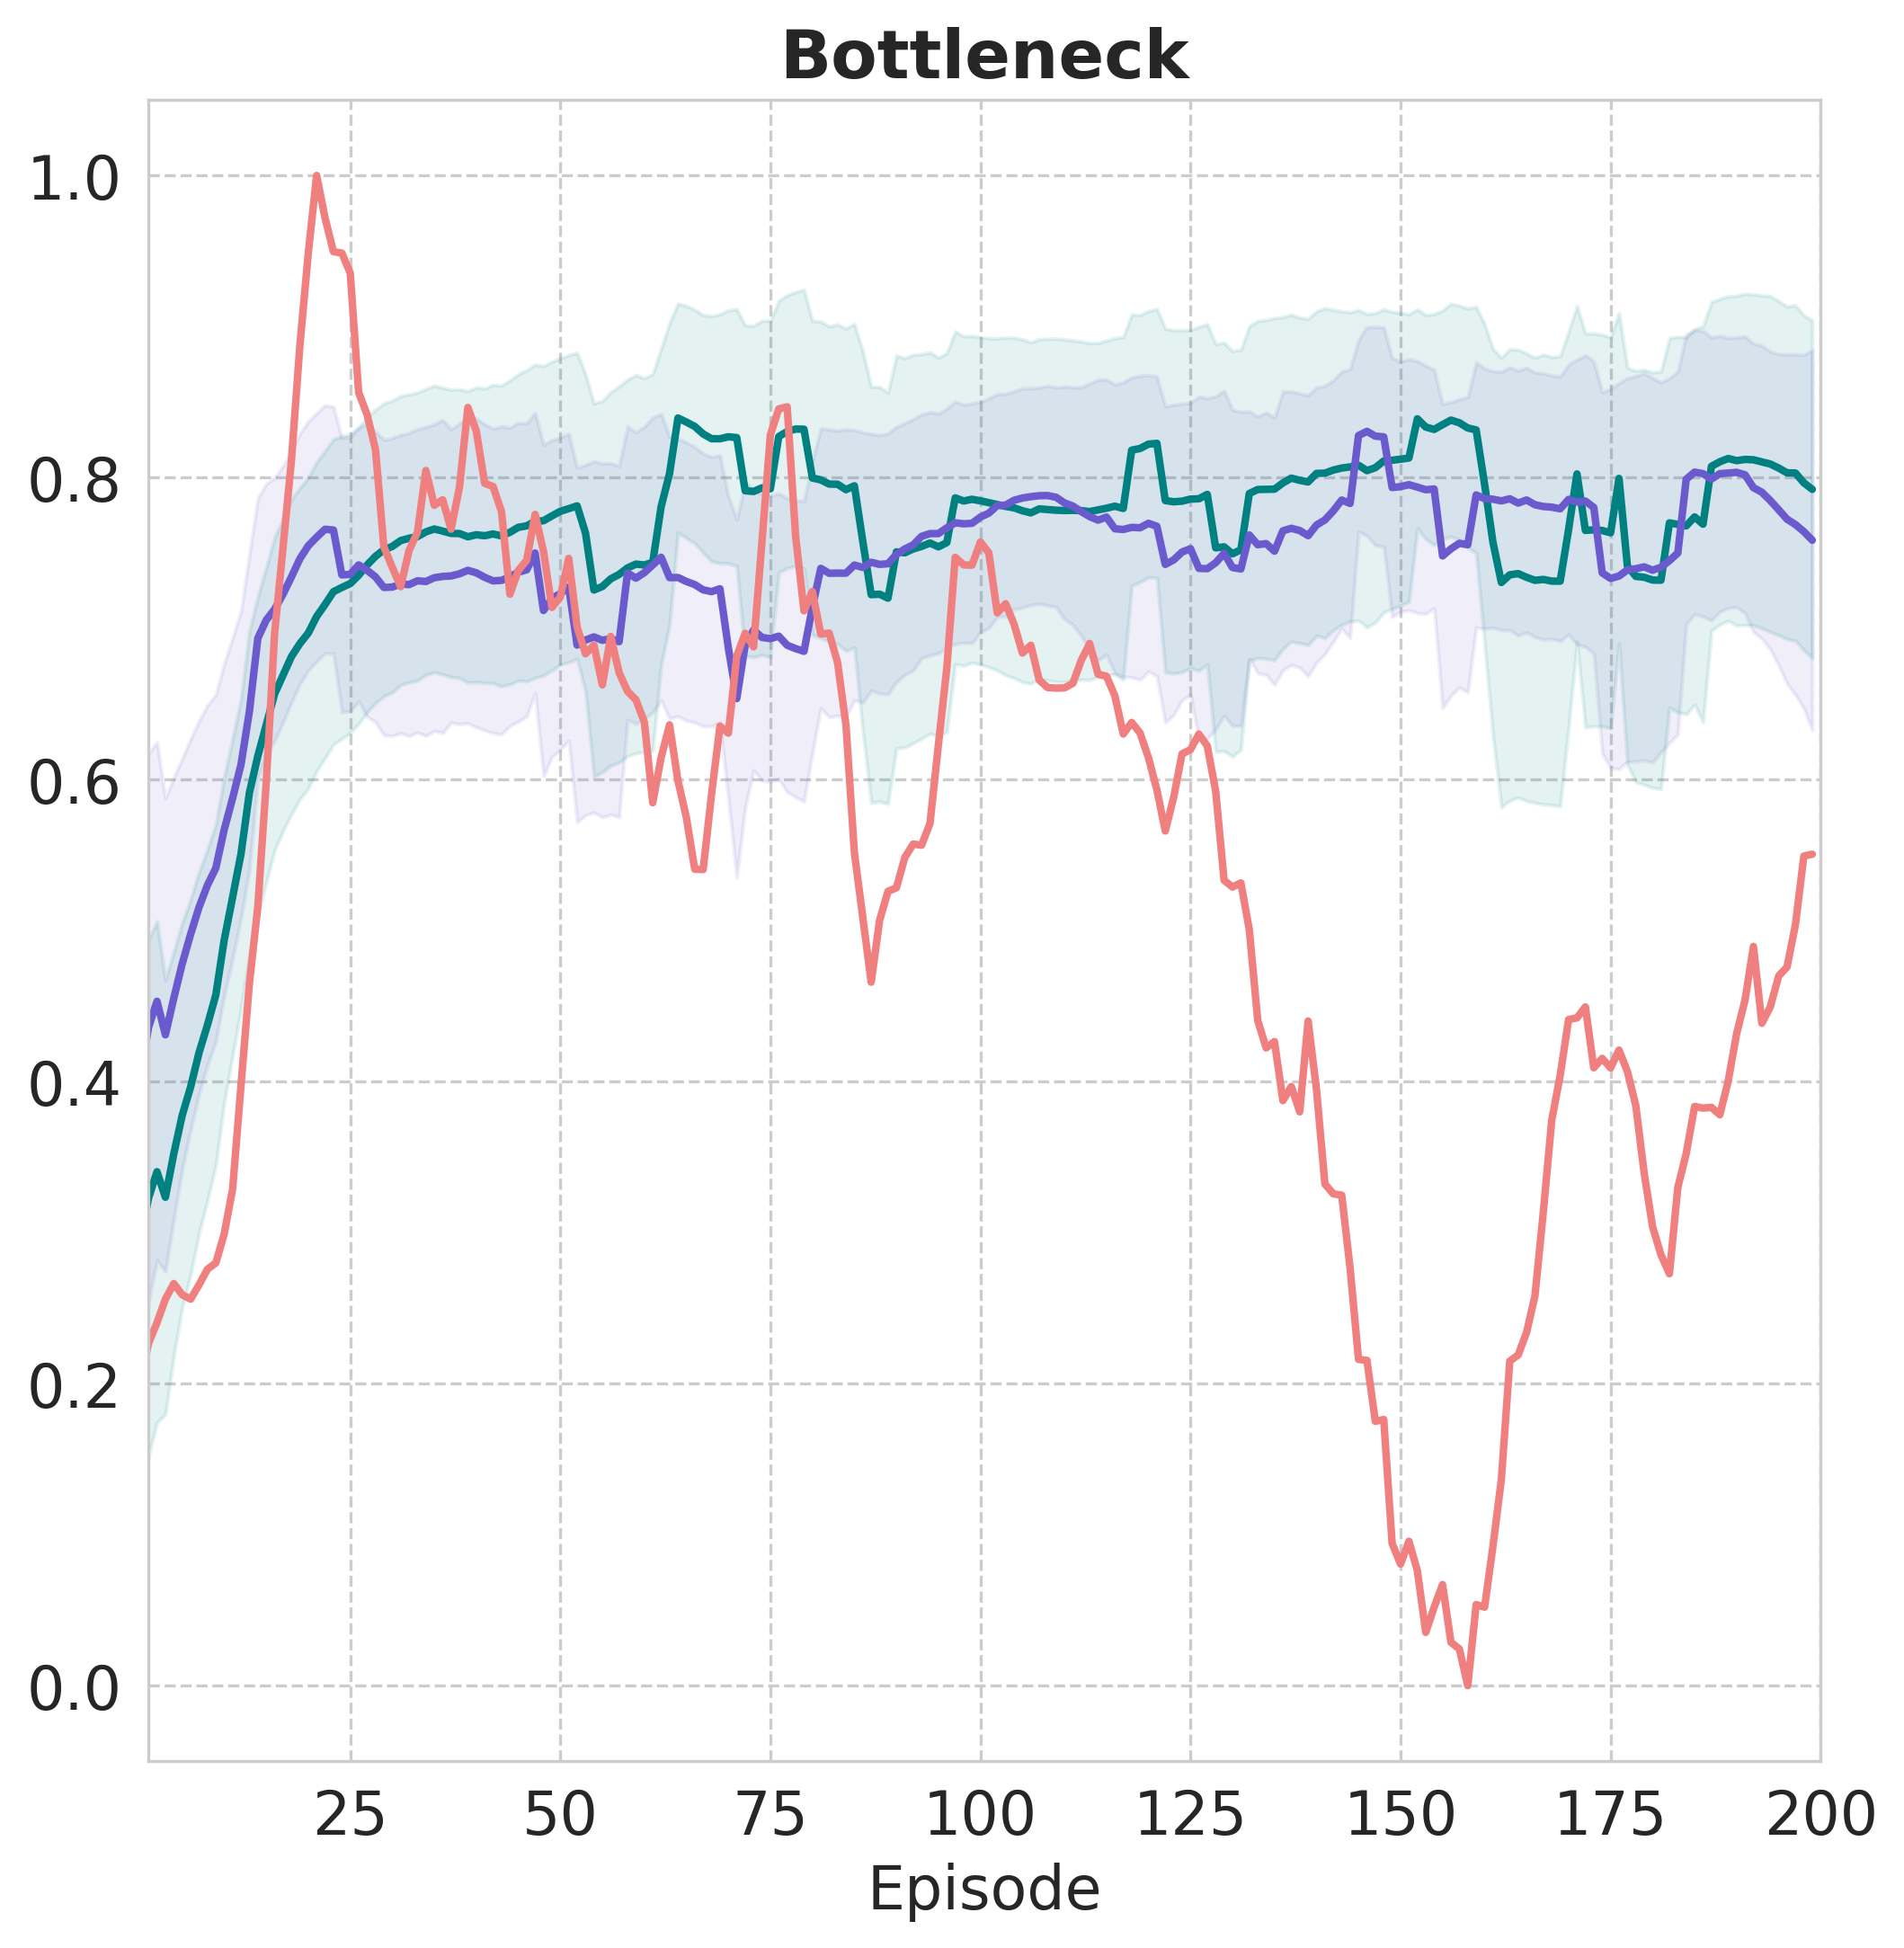

In [3]:
import re
import os 
import csv

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 
sns.set_style("whitegrid", {"grid.linestyle":"--"})

import pandas as pd 
from pprint import pprint

episode_size = 200 
roll_size = 1

# all_human = []
# for result in best_policies_human:
#     data = norm_best_policies_human[result]['all_norm'][0:episode_size]
#     all_human.append(data)
# all_human = np.array(all_human)
# all_human_mean = np.mean(all_human, axis=0)
# print(all_human_mean.shape)
    
    
# all_human_gpt = []
# for result in best_policies_human_gpt:
#     data = norm_best_policies_human_gpt[result]['all_norm'][0:episode_size]
#     all_human_gpt.append(data)
# all_human_gpt = np.array(all_human_gpt)
# all_human_gpt_mean = np.mean(all_human_gpt, axis=0)
# print(all_human_gpt_mean.shape)

def read_expert_progress():
    # Step 1: Read the csv file
    dataframe = pd.read_csv('bn_expert_reward.csv')

    # Step 2: Get values of a specific column (for instance 'column_name')
    values = dataframe['episode_reward_mean'].values

    # Step 3: Save the values to a numpy array
    np_array = np.array(values)

    # Step 4: Normalize the values within the numpy array to be between 0 and 1
    normalized_array = (np_array - np.min(np_array)) / (np.max(np_array) - np.min(np_array))
    
    return normalized_array


def read_csv_to_numpy_array(input_filename):
    with open(input_filename, 'r') as input_file:
        csv_reader = csv.reader(input_file)
        row = next(csv_reader)
        numerical_row = list(map(float, row))
        numpy_array = np.array(numerical_row)
    return numpy_array

all_human_mean = read_csv_to_numpy_array("bn_avgsnorm_human.csv")
all_human_gpt_mean = read_csv_to_numpy_array("bn_avgsnorm_gpt.csv")

var_all_human = read_csv_to_numpy_array("bn_varnorm_human.csv")
var_all_human_gpt = read_csv_to_numpy_array("bn_varnorm_gpt.csv")

expert_reward = read_expert_progress()

print(var_all_human.shape)
print(var_all_human_gpt.shape)


# plot
fig,ax = plt.subplots(figsize=(8,8), dpi=300)
fs = 16

# rolling 
all_human_rolling_mean = pd.Series(all_human_mean).rolling(window=roll_size).mean()
all_human_gpt_rolling_mean = pd.Series(all_human_gpt_mean).rolling(window=roll_size).mean()

ax.plot(all_human_gpt_rolling_mean, color='teal', linewidth='2.0', label = "Novices + ChatGPT")
ax.plot(all_human_rolling_mean, color='slateblue', linewidth='2.0', label = "Novices")

ax.plot(expert_reward, color='lightcoral', linewidth='2.0', label = "Expert")

# # Calculate min and max for each episode across all trials for humans
# min_human = np.min(all_human, axis=0)
# max_human = np.max(all_human, axis=0)

# # Calculate min and max for each episode across all trials for humans + GPT-4
# min_human_gpt = np.min(all_human_gpt, axis=0)
# max_human_gpt = np.max(all_human_gpt, axis=0)

# Add error lines (non-rolling)
# ax.fill_between(range(episode_size), min_human, max_human, color='b', alpha=0.2)
# ax.fill_between(range(episode_size), min_human_gpt, max_human_gpt, color='r', alpha=0.2)


# # standard deviation bar
# std_all_human = np.std(all_human, axis=0)
# print(std_all_human.shape)

# Add error lines
ax.fill_between(range(episode_size), (all_human_rolling_mean - var_all_human), (all_human_rolling_mean + var_all_human), color='slateblue', alpha=0.1)
ax.fill_between(range(episode_size), (all_human_gpt_rolling_mean - var_all_human_gpt), (all_human_gpt_rolling_mean + var_all_human_gpt), color='teal', alpha=0.1)

ax.set_ylim([-0.05,1.05])
ax.set_xlim([roll_size, episode_size])

ax.set_title("Bottleneck", fontsize = fs+2, fontweight="bold")
# ax.set_ylabel("Normalized Reward", fontsize = fs)
ax.set_xlabel("Episode", fontsize = fs)
ax.tick_params(axis='both', which='major', labelsize=fs)

# ax.legend(fontsize=fs+4, loc = 'lower left')

plt.savefig('./bn_training_curve.png')